In [1]:
%matplotlib inline

This notebook makes a plot of $F_{\rm bulge}(M_{\ast})$ and $F_{\rm disk}(M_{\ast})$ for SDSS, and saves the results of the measurement to disk in the form of a numpy binary. 

### Load SDSS data from disk

In [2]:
from empirical_disk_bulge.observations import load_umachine_sdss_complete

sdss = load_umachine_sdss_complete()
mask = sdss['type_mendel13'] != 4
mask *= sdss['deltaBD_mendel13'] <= 1
cut_sdss = sdss[mask]
print("{0} of {1} galaxies cut from sample due to B/T cuts".format(len(sdss)-len(cut_sdss), 
                                                                   len(sdss)))

16266 of 145653 galaxies cut from sample due to B/T cuts


### Calculate $F_{\rm bulge}(M_{\ast})$ and $F_{\rm disk}(M_{\ast})$ and save to disk

In [3]:
from empirical_disk_bulge.observations import sfr_sequence_bulge_disk_fractions_vs_sm


_result = sfr_sequence_bulge_disk_fractions_vs_sm(cut_sdss['bt'], 
                                              cut_sdss['sm'], cut_sdss['ssfr'])

np.save('frac_bulge_disk_vs_sm_mendel13', np.array(_result))

del _result

In [4]:
_result_from_disk = np.load('frac_bulge_disk_vs_sm_mendel13.npy')
result_from_disk = [_result_from_disk[i, :] for i in range(_result_from_disk.shape[0])]

sm_abscissa, frac_disk_dom_all, frac_bulge_dom_all,\
    frac_disk_dom_sfs, frac_bulge_dom_sfs, \
    frac_disk_dom_gv, frac_bulge_dom_gv, \
    frac_disk_dom_q, frac_bulge_dom_q = result_from_disk

### Plot $F_{\rm bulge}(M_{\ast})$ and $F_{\rm disk}(M_{\ast})$

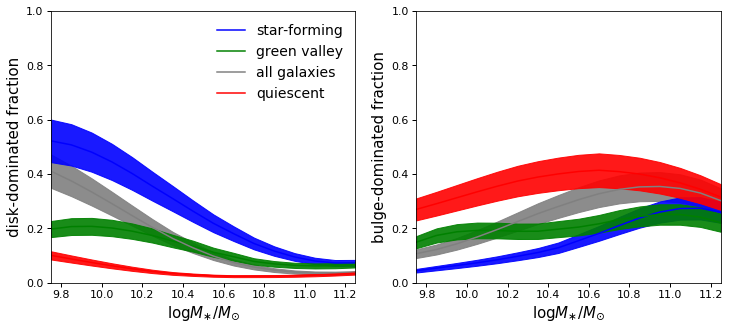

In [5]:
from scipy.signal import savgol_filter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

a, b = 11, 3

fracerr = 0.15
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_all, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_all, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='gray', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_sfs, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_sfs, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='blue', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_gv, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_gv, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='green', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_disk_dom_q, a, b), 
               (1+fracerr)*savgol_filter(frac_disk_dom_q, a, b))
__=ax1.fill_between(sm_abscissa, ylow, yhigh, color='red', alpha=0.9)

ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_all, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_all, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='gray', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_sfs, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_sfs, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='blue', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_gv, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_gv, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='green', alpha=0.9)
ylow, yhigh = ((1-fracerr)*savgol_filter(frac_bulge_dom_q, a, b), 
               (1+fracerr)*savgol_filter(frac_bulge_dom_q, a, b))
__=ax2.fill_between(sm_abscissa, ylow, yhigh, color='red', alpha=0.9)

__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_sfs, a, b), 
           color='blue', label='star-forming')
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_gv, a, b),
           color='green', label='green valley')
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_all, a, b), 
           color='gray', label='all galaxies')
__=ax1.plot(sm_abscissa, savgol_filter(frac_disk_dom_q, a, b),
           color='red', label='quiescent')
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_sfs, a, b),
           color='blue', label='star-forming sequence')
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_gv, a, b),
           color='green', label='green valley')
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_all, a, b),
           color='gray', label='all galaxies')
__=ax2.plot(sm_abscissa, savgol_filter(frac_bulge_dom_q, a, b),
           color='red', label='quiescent')

xlabel1 = ax1.set_xlabel(r'$\log M_{\ast}/M_{\odot}$', size=15)
xlabel2 = ax2.set_xlabel(r'$\log M_{\ast}/M_{\odot}$', size=15)
ylabel1 = ax1.set_ylabel(r'disk-dominated fraction', size=15)
ylabel2 = ax2.set_ylabel(r'bulge-dominated fraction', size=15)
legend1 = ax1.legend(fontsize=14)

xmin, xmax = 9.75, 11.25
xlim1 = ax1.set_xlim(xmin, xmax)
xlim2 = ax2.set_xlim(xmin, xmax)
ymin, ymax = 0, 1
ylim1 = ax1.set_ylim(ymin, ymax)
ylim2 = ax2.set_ylim(ymin, ymax)

fig.savefig('frac_bulge_disk_vs_sm_mendel13.pdf', 
            bbox_extra_artists=[xlabel1, ylabel1], bbox_inches='tight')


### Inspect the full B/T PDFs for a few samples

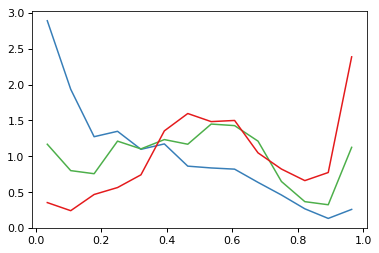

In [6]:
from empirical_disk_bulge.observations import bt_pdf_fixed_sm_ssfr

npts_bt = 15
bt_abscissa = np.linspace(0, 1, npts_bt)
np.save('bt_abscissa', bt_abscissa)
bt_mids = 0.5*(bt_abscissa[:-1] + bt_abscissa[1:])

fixed_sm, fixed_ssfr = 10, -10.
result_sf = bt_pdf_fixed_sm_ssfr(cut_sdss['bt'], cut_sdss['sm'], cut_sdss['ssfr'], 
                     fixed_sm, fixed_ssfr, bt_abscissa,
                    sigma_sm=0.1, sigma_ssfr=0.25) 
fixed_sm, fixed_ssfr = 10, -11.
result_green = bt_pdf_fixed_sm_ssfr(cut_sdss['bt'], cut_sdss['sm'], cut_sdss['ssfr'], 
                     fixed_sm, fixed_ssfr, bt_abscissa,
                    sigma_sm=0.1, sigma_ssfr=0.25) 
fixed_sm, fixed_ssfr = 10, -11.5
result_q = bt_pdf_fixed_sm_ssfr(cut_sdss['bt'], cut_sdss['sm'], cut_sdss['ssfr'], 
                     fixed_sm, fixed_ssfr, bt_abscissa,
                    sigma_sm=0.1, sigma_ssfr=0.25) 

fig, ax = plt.subplots(1, 1)

__=ax.plot(bt_mids, result_sf, color=blue)
__=ax.plot(bt_mids, result_green, color=green)
__=ax.plot(bt_mids, result_q, color=red)
